# წარმოებული

სᲬინა ლექციაში ჩვენი ფუნქციისთვის x^2 უკვე გამოვიყენეთ ფორმულა კონკრეტულ წერტილში დახრილობის კოეფიციენტის დასათვლელად, და მივიღეთ 2X.

Გავიხსენოთ, როგორ მივედით ამ ფორმულამდე.

Ჩვენ მაქსიმალურად შევამცირეთ დელტა იქსი, რადგან გვაინტერესებდა დახრილობა კონკრეტულ წერტილში,
Ასეთ დროს დელტებს ანაცვლებს ახალი ანოტაცია d
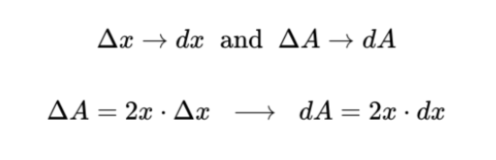



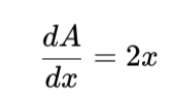

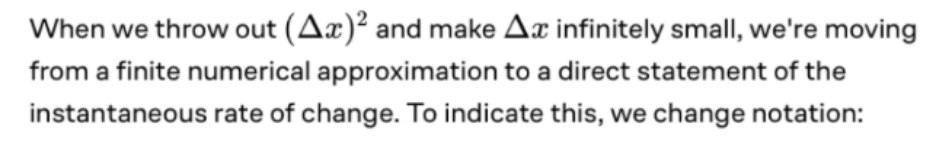 -

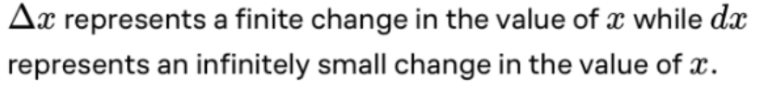

# dA/dx - ნაზრდების შეფარდება, როცა დელტები უახლოვდებიან 0-ს.

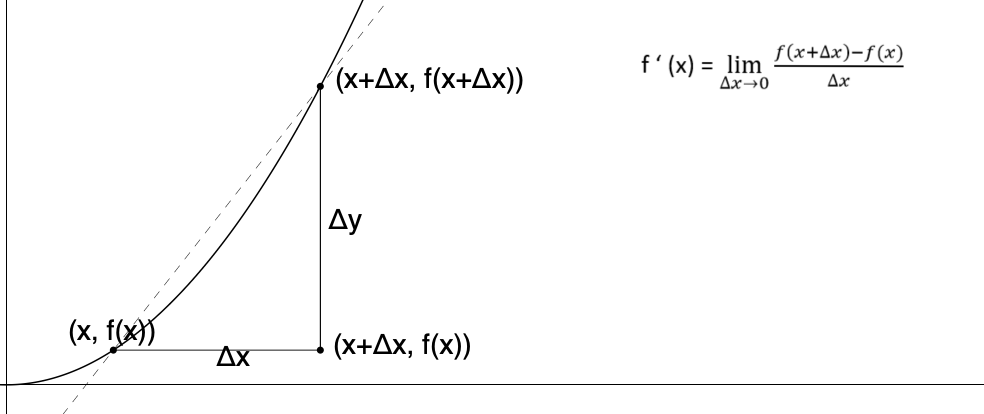

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, VBox, HBox, Output
from IPython.display import display

def f(x):
    return x**2

def f_prime(x):
    return 2*x

# Output ვიჯეტების შექმნა
out_plot = Output()
out_text = Output()

@out_plot.capture()
def plot_derivative_limit(x, delta_x):
    with out_text:
        out_text.clear_output(wait=True)

    x_range = np.linspace(x - 1, x + 1, 200)
    y = f(x_range)

    fig, ax = plt.subplots(figsize=(12, 8))

    # ფუნქციის გრაფიკი
    ax.plot(x_range, y, 'b-', label='f(x) = x²')

    # წერტილები
    ax.plot(x, f(x), 'ro', markersize=8)
    ax.plot(x + delta_x, f(x + delta_x), 'ro', markersize=8)

    # სეკანტი
    secant_slope = (f(x + delta_x) - f(x)) / delta_x
    secant_y = secant_slope * (x_range - x) + f(x)
    ax.plot(x_range, secant_y, 'g--', label='სეკანტი')

    # მხები
    tangent_y = f_prime(x) * (x_range - x) + f(x)
    ax.plot(x_range, tangent_y, 'r-', label='მხები')

    # Δx და Δy
    ax.annotate('', xy=(x + delta_x, f(x)), xytext=(x, f(x)),
                arrowprops=dict(arrowstyle='<->', color='purple'))
    ax.annotate('Δx', xy=(x + delta_x/2, f(x) - 0.5), ha='center', va='top', color='purple')

    ax.annotate('', xy=(x + delta_x, f(x + delta_x)), xytext=(x + delta_x, f(x)),
                arrowprops=dict(arrowstyle='<->', color='purple'))
    ax.annotate('Δy', xy=(x + delta_x + 0.1, (f(x + delta_x) + f(x))/2), ha='left', va='center', color='purple')

    ax.set_title('წარმოებულის, როგორც ზღვრის ვიზუალიზაცია')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

    plt.tight_layout()

    out_plot.clear_output(wait=True)
    display(fig)
    plt.close(fig)

    with out_text:
        print(f"x = {x:.2f}")
        print(f"Δx = {delta_x:.4f}")
        print(f"სეკანტის დახრილობა = {secant_slope:.4f}")
        print(f"მხების დახრილობა (f'(x)) = {f_prime(x):.4f}")

interactive_plot = interactive(plot_derivative_limit,
                               x=FloatSlider(min=-2, max=2, step=0.1, value=1, description='x:'),
                               delta_x=FloatSlider(min=0.0001, max=1, step=0.0001, value=0.5, description='Δx:'))

display(VBox([interactive_plot, HBox([out_plot, out_text])]))

Ამ ფუნქციით შეგვიძლია გამოვითვალოთ ნებისმიერი წერტილისთვის tangent line-ის დახრილობა.
## სწორედ Ამ გამოსახულებას, რომელიც აღწერს ფუნქციის მყისიერი ცვლილების სიჩქარეს კონკრეტულ წერტილზე და გვაძლევს ამ წერტილზე ფუნქციის მხების დახრილობას, ვეძახით ფუნქციის **"წარმოებულს".**


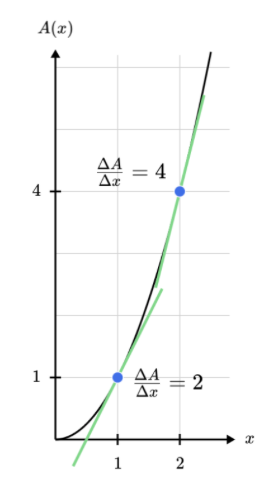

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, VBox, HBox, Output
from IPython.display import display

def A(x):
    return x**2

def A_prime(x):
    return 2*x

# Output ვიჯეტების შექმნა
out_plot = Output()
out_text = Output()

@out_plot.capture()
def plot_tangent_lines(x1, x2):
    with out_text:
        out_text.clear_output(wait=True)

    x = np.linspace(0, 3, 300)
    y = A(x)

    fig, ax = plt.subplots(figsize=(12, 8))

    # ფუნქციის გრაფიკი
    ax.plot(x, y, 'b-', label='A(x) = x²')

    # პირველი წერტილი და მხები
    y1 = A(x1)
    slope1 = A_prime(x1)
    tangent1 = slope1 * (x - x1) + y1
    ax.plot(x, tangent1, 'g-', label=f'მხები x={x1:.2f}')
    ax.plot(x1, y1, 'bo', markersize=8)
    ax.annotate(f'ΔA/Δx = {slope1:.2f}', (x1, y1), xytext=(5, 5),
                textcoords='offset points', ha='left', va='bottom')

    # მეორე წერტილი და მხები
    y2 = A(x2)
    slope2 = A_prime(x2)
    tangent2 = slope2 * (x - x2) + y2
    ax.plot(x, tangent2, 'r-', label=f'მხები x={x2:.2f}')
    ax.plot(x2, y2, 'bo', markersize=8)
    ax.annotate(f'ΔA/Δx = {slope2:.2f}', (x2, y2), xytext=(5, 5),
                textcoords='offset points', ha='left', va='bottom')

    ax.set_xlim(0, 3)
    ax.set_ylim(0, 9)
    ax.set_xlabel('x')
    ax.set_ylabel('A(x)')
    ax.set_title('ფუნქცია და მხები წრფეები')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()

    out_plot.clear_output(wait=True)
    display(fig)
    plt.close(fig)

    with out_text:
        print(f"წერტილი 1: x = {x1:.2f}, A(x) = {y1:.2f}, A'(x) = {slope1:.2f}")
        print(f"წერტილი 2: x = {x2:.2f}, A(x) = {y2:.2f}, A'(x) = {slope2:.2f}")

interactive_plot = interactive(plot_tangent_lines,
                               x1=FloatSlider(min=0.1, max=2.9, step=0.1, value=1, description='x1:'),
                               x2=FloatSlider(min=0.1, max=2.9, step=0.1, value=2, description='x2:'))

display(VBox([interactive_plot, HBox([out_plot, out_text])]))

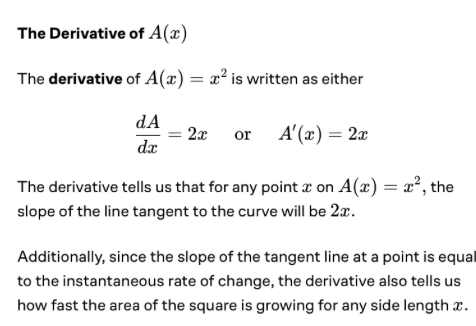

Გასაგებია, რომ რაღაც წერტილებში შეგვიძლია დავითვალოთ მოც ფუნქციის წარმოებული, მაგრამ რასაკვირველია, ნებისმიერ წერტილში ამ მნიშვნელობის დათვლა არ გვჭირდება.

Ერთ-ერთი მთავარი გამოყენება წარმოებულის, არის ფუნქციის **უმცირესი** და **უდიდესი** მნშვნელობების პოვნა.


Დავაკვირდეთ როგორი იქნება მხები წრფის დახრილობა სხვადასხვა წერტილში მოცემულ ფუნქციის გრაფიკზე:

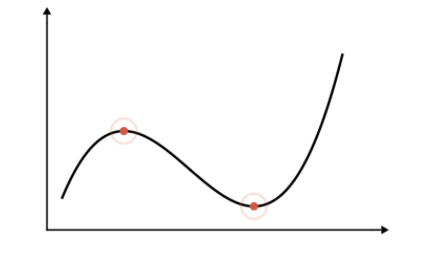

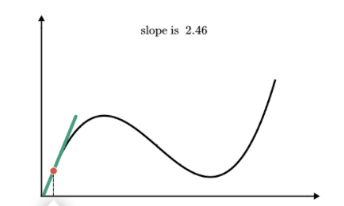

Წარმოვიდგინოთ, წრფის დახრილობის მიხედვით რა ემართება წერტილს - ქვემოთ გორდება, ზემოთ მიცოცავს თუ, გაჩერებულია ?  


**Იმ წერტილებში, სადაც დახრილობის კოეფიციენტი 0-ია , ფუნქცია არც იზრდება, არც მცირდება. Კარგად დავაკვირდეთ რა წეტრილებია ეს გრაფიკზე.**


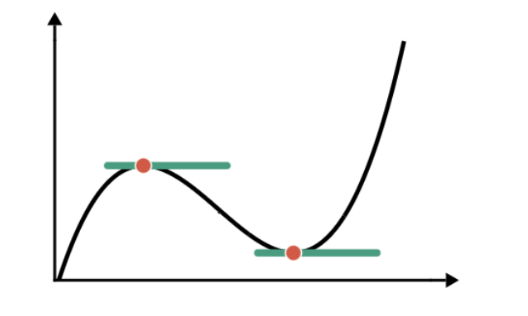


## Არ დაგვავიწყდეს, რომ მოც. Წერტილში ფუნქციის წარმოებული უდრის ამ წერტილში გავლებული მხები წრფის დახრილობის კოეფიციენტს!


Ფუნქციის მაქსიმალური მნიშვნელობის პოვნა უამრავ ამოცანაში შეიძლება დაგვჭირდეს. Მაგალითად, ერთ-ერთი ყველაზე ბანალური შემთხვევაა როდესაც რაიმე ბიზნესს უნდა მაქსიმალურ მოგებაზე გასვლა. Წარმოვიდგინოთ, რომ ვყიდით რაღაც ნივთს,არ აქვს მნიშვნელობა რას , და ჩვენი მოგება იზომება

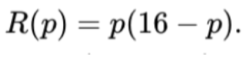 აი ამ ფუნქციით,  სადაც p არის ერთეულის ფასი. Გვაინტერესებს, რა ფასად უნდა გავყიდოთ ეს ჩვენი პროდუქტი, რომ გავიდეთ მაქსიმალურ მოგებაზე.

Წეღან ჩვენ უკვე ვნახეთ, როდის არის ფუნქციის მნიშვნელობა მაქსიმალური - იმ წერტილებში, სადაც ფუნქციის წარმოებული უდრის 0-ს. ეს პირობა სხვა წერტილებისთვისაც შეიძლება სრულდებოდეს, თუმცაღა , უდიდესი მნიშვნელობის წერტილზეც აუცილებლად 0 იქნება წარმოებული.
 Ესეიგი, პირველ რიგში, უნდა ვიპოვოთ ისეთი წერტილები, რომლისთვისაც წარმოებული 0-ს უდრის, და მერე იქიდან ავარჩევთ, რომელი არის მინიმალური და რომელი მაქსიმალური.


Მოდი ვცადოთ ახლა dR/dp ს გამოსახვა, ჩვენი მიზანია dR/dp = 0 წერტილების პოვნა


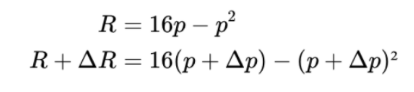

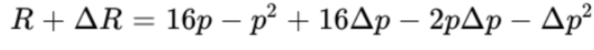

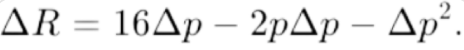

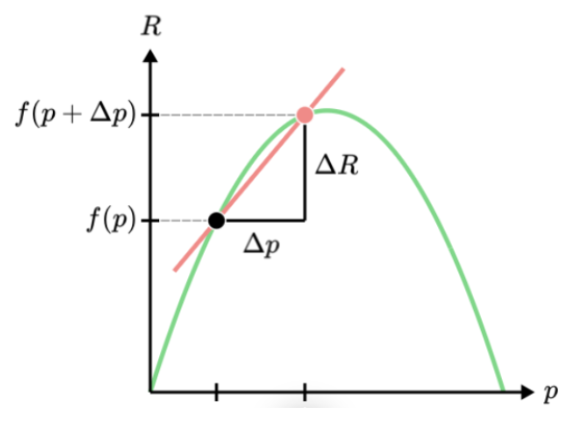

Ამ შემთხვევაშიც, როგორც წინაზე, გვინდა ძალიან ძალიან მიახლოება კონკრეტულ წერტილთან, რადგან ზუსტად კონკრეტულ წერტილში გვაინტერესებს ცვლილება, მაგისთვის, ეს ჩვენი ხაზი უნდა დავამოკლოთ ძალიან რაც გამოიწვევს ΔP-ს მაქსიმალურად შემცირებას, ΔP-ს მაქსიმალური შემცირება კი Δ
P^2-ის დაიგნორებას გამოიწვევს :


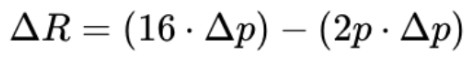

შემოვიღოთ ჩვენი აღვნიშვნები კონკრეტული rate-ის გამოსათვლელად:
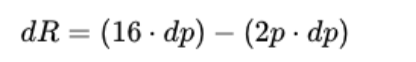

ეს გამოვიდა ჩვენი ფუნქციის წარმოებული:

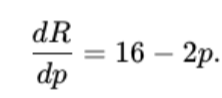


Რა უნდა გავაკეთოთ ახლა? Როგორც გახსოვთ, ჩვენ გვინდოდა იმ წერტილ(ებ)ის პოვნა, რდესაც წარმოებულის მნიშვნელობა არის 0.
Ე.ი.

16-2p = 0
-> p = 8


Ეს იმას ნიშნავს, რომ მაქსიმალური მოგებისთვის 1 ერთეული 8 ლარად უნდა გავყიდოთ - რა იქნება ამ დროს ჩვენი მაქსიმალური მოგება?
p(16-p) = 8 * 8 = 64 ლარი


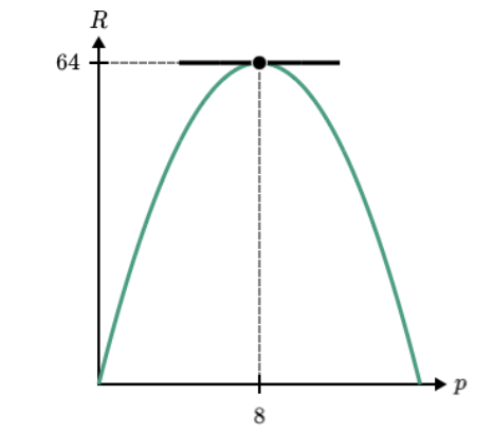

Თუ ჩვენ გამოვითვლით მოგების ფუქნციის წარმოებულს, და დავითვლით ფასის (x-ის) მნიშვნელობას როდესაც ეს წარმოებული უდრის ნულს, შეგვიძლია დარწმუნებულები ვიყოთ რომ მაქსიმალურ მოგებაზე გავალთ.

თუმცა, შეიძლებოდა, ერთხელ გაწარმოება საკმარისი არ ყოფილიყო, ჩვენი ფუნქციის გრაფიკს მსგავსი ფორმა რომ ჰქონოდა:

მაგალითად, მოცემული წერტილისთვის პირველადი წარმოებული 0-ის ტოლია, თუმცა ეს არ არის არც ფუნქციის გლობალური მინიმუმი და არც მაქსიმუმი. ასეთ დროს, იმის დასადგენად, ესა თუ ის წერტილი ჩაზნექილობის წერტილია თუ ამოზნექილობის, ანუ ლოკალური მინიმუმია თუ მაქსიმუმი, გამოიყენება მეორადი წარმოებულის ტესტი, რაც ნიშნავს პირველადი წარმოებულის კიდევ ერთხელ გაწარმოებას.

[რას ნიშნავს გლობალური/ლოკალური მინ./მაქსიმუმი - y-ის შესაძლო, ყველაზე დიდ მნიშვნელობას, ფუნქციის გლობალური მაქსიმუმი ეწოდება. ხოლო  y -ის შესაძლო ყველაზე მცირე მნიშვნელობას - ფუნქციის გლობალური მინიმუმი . ორივეს ერთად კი - გლობალური ექსტრემუმები. ფუქნციას გლობალური ექსტრემუმების არსებობის შემთხვევაში, გააჩნია ერთადერთი გლობალური მინიმუმი და ერთადერთი გლობალური მაქსიმუმი. გლობალურ მაქსიმუმსა და მინიმუმთან ერთად, ფუნქციას შეიძლება გააჩნდეს  ლოკალური ექსტრემუმები ანუ  ლოკალური მაქსიმუმი და ლოკალური მინიმუმი. სიტყვა ლოკალურის დროს განვიხილავთ ფუნქციის მაქსიმუმსა და მინიმუმს განსაზღვრის არის გარკვეულ შუალედზე. ამ წერტილებს, შესაბამისად, ამოზნექილობა/ჩაზნექილობის წერტილებიც ეწოდება]

მეორადი წარმოებულის დადებითობა მიუთითებს ამოზნექილობაზე  ამ წერტილში-ში, ასე რომ, ეს ლოკალური მინიმუმია.

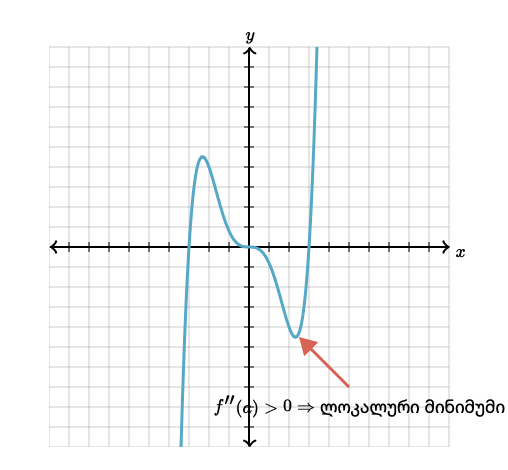


მეორადი წარმოებულის უარყოფითობა მიუთითებს უარყოფით ჩაზნექილობაზე  ამ წერტილში-ში, ასე რომ, ეს ლოკალური მაქსიმუმია

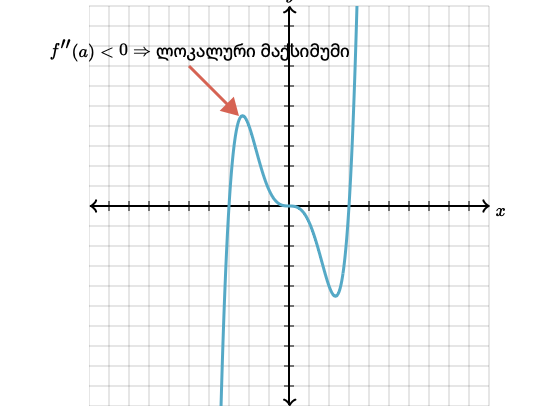

თუ მეორადი წარმოებული 0-ს უდრის, არ არის ნათელი რა სიტუაცია შეიძლება იყოს. სხვადასხვა ფუნქციისთვის შეიძლება ეს იყოს ან გაღუნვის წერტილი, ან ლოკალური მინიმუმი/მაქსიმუმი. იხ. სურათზე:
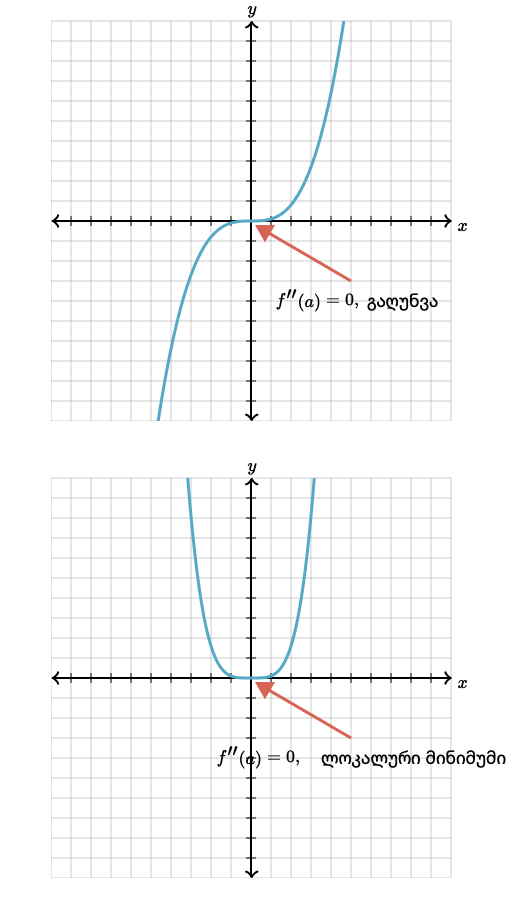![image.png]()
